In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
from fbprophet import Prophet

In [9]:
os.chdir('D:\\DL and ML Practical Tutorials - Package\\Project 4')

In [10]:
avocado_df = pd.read_csv('avocado.csv')

In [11]:
avocado_df.shape

(18249, 14)

In [12]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Explore The Dataset

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


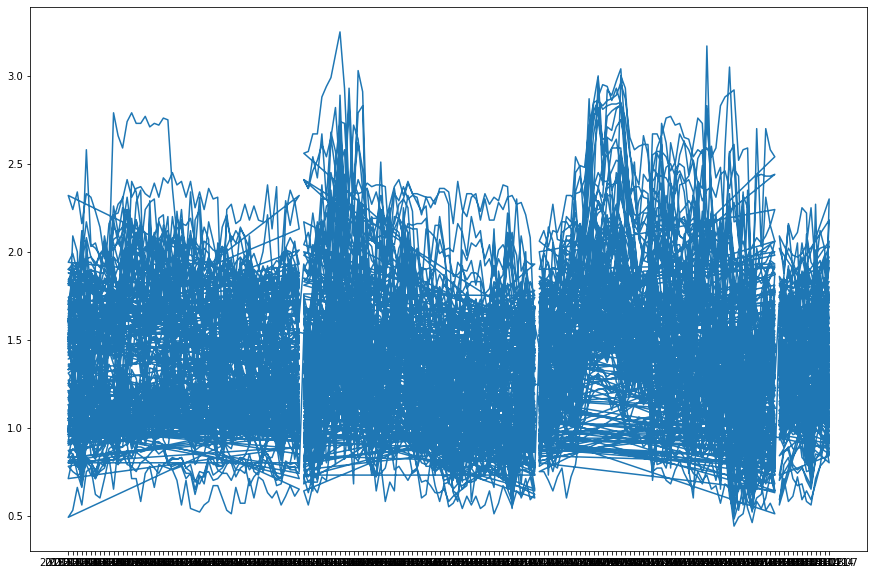

In [15]:
plt.figure(figsize=(15,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

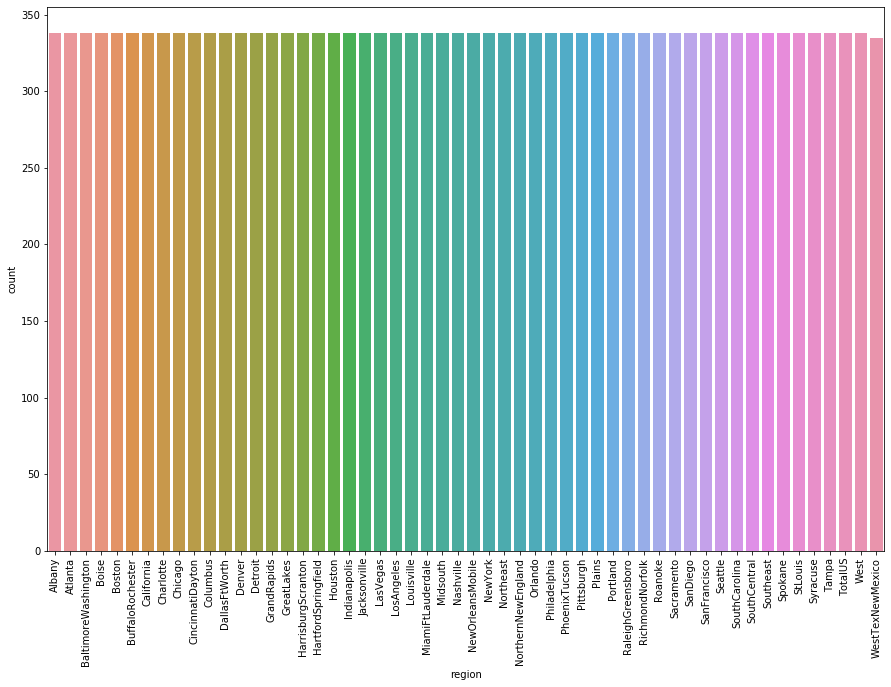

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='region',data= avocado_df)
plt.xticks(rotation=90)

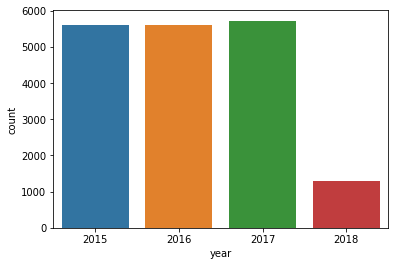

In [25]:
sns.countplot(x='year',data =avocado_df)

## Make Dataset By Useful Columns For Predictions

In [27]:
avocado_prophet = avocado_df [['Date','AveragePrice']]

In [28]:
avocado_prophet

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


## Now Rename The Columns For Future Predictions

In [30]:
avocado_rename = avocado_prophet.rename(columns={'Date':'ds','AveragePrice': 'y'})

In [31]:
avocado_rename

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


# Now Make the Prediction

In [32]:
out = Prophet()
out.fit(avocado_rename)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecast the Future


In [33]:
future = out.make_future_dataframe(periods=730)
forecast = out.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501916,0.925926,1.868621,1.501916,1.501916,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,0.0,0.0,0.0,1.383826
1,2015-01-04,1.501916,0.896603,1.859803,1.501916,1.501916,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,0.0,0.0,0.0,1.383826
2,2015-01-04,1.501916,0.876561,1.851703,1.501916,1.501916,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,0.0,0.0,0.0,1.383826
3,2015-01-04,1.501916,0.948559,1.883248,1.501916,1.501916,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,0.0,0.0,0.0,1.383826
4,2015-01-04,1.501916,0.925574,1.852008,1.501916,1.501916,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,-0.118090,0.0,0.0,0.0,1.383826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2020-03-20,0.890247,-0.019531,1.595099,0.299489,1.511443,-0.086638,-0.086638,-0.086638,-0.086638,-0.086638,-0.086638,0.0,0.0,0.0,0.803609
18975,2020-03-21,0.889507,0.077996,1.595339,0.297337,1.512241,-0.084923,-0.084923,-0.084923,-0.084923,-0.084923,-0.084923,0.0,0.0,0.0,0.804584
18976,2020-03-22,0.888766,-0.019753,1.628363,0.295214,1.512470,-0.082927,-0.082927,-0.082927,-0.082927,-0.082927,-0.082927,0.0,0.0,0.0,0.805840
18977,2020-03-23,0.888026,0.067339,1.634640,0.293052,1.512959,-0.080668,-0.080668,-0.080668,-0.080668,-0.080668,-0.080668,0.0,0.0,0.0,0.807358


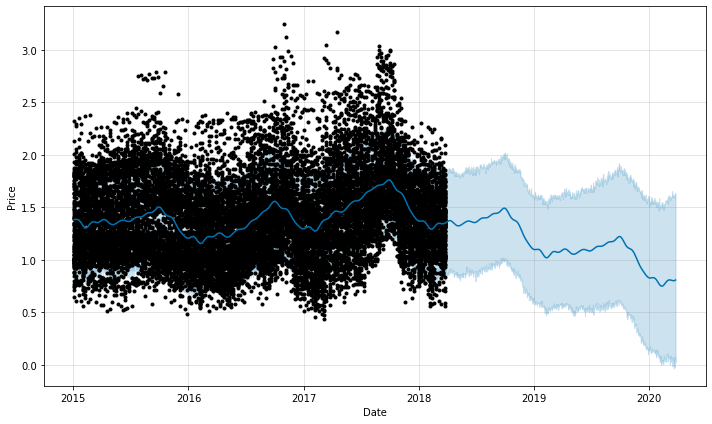

In [35]:
figure =out.plot(forecast ,xlabel='Date',ylabel='Price')

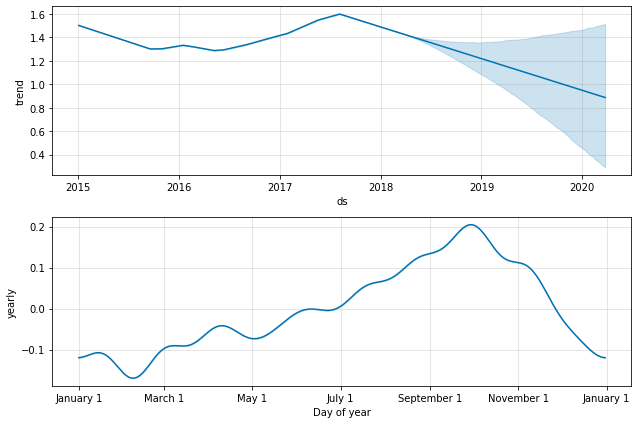

In [36]:
figure = out.plot_components(forecast)

## Thanks For Visiting My work